Predict Car Prices

Dataset: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection

In [2]:
dataset = pd.read_csv("car data.csv")
dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
dataset.shape

(301, 9)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


No null values 

In [12]:
print(dataset.Fuel_Type.value_counts(),'\n')
print(dataset.Seller_Type.value_counts(),'\n')
print(dataset.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [13]:
# encoding data
dataset.replace({'Fuel_Type':{"Petrol":0,'Diesel':1,"CNG":2}},inplace=True)
dataset.replace({'Seller_Type':{'Dealer':0,"Individual":1}},inplace=True)
dataset.replace({'Transmission':{'Manual':0,"Automatic":1}},inplace=True)


In [15]:
X=dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=dataset['Selling_Price']

In [18]:
# splitting the data 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)


In [19]:
# train model
model=LinearRegression()

In [20]:
model.fit(X_train,Y_train)

LinearRegression()

In [22]:
# training accuracy
train_pred=model.predict(X_train)
train_acc=metrics.r2_score(Y_train,train_pred)
train_acc

0.8799451660493708

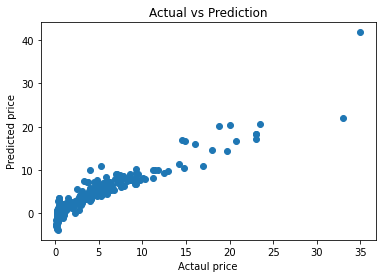

In [23]:
plt.scatter(Y_train,train_pred)
plt.xlabel("Actaul price")
plt.ylabel("Predicted price")
plt.title("Actual vs Prediction")
plt.show()

In [24]:
test_pred=model.predict(X_test)
test_acc=metrics.r2_score(test_pred,Y_test)
test_acc

0.8062199941176169

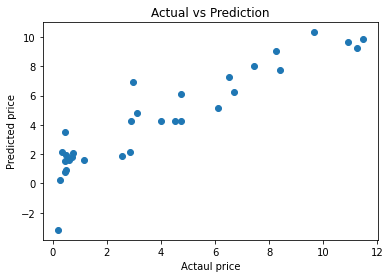

In [27]:
plt.scatter(Y_test,test_pred)
plt.xlabel("Actaul price")
plt.ylabel("Predicted price")
plt.title("Actual vs Prediction")
plt.show()

In [28]:
# Lasso Regression
model_lasso=Lasso()

In [29]:
model_lasso.fit(X_train,Y_train)

Lasso()

In [32]:
# training accuracy
train_pred=model_lasso.predict(X_train)
train_acc=metrics.r2_score(Y_train,train_pred)
train_acc

0.8427856123435794

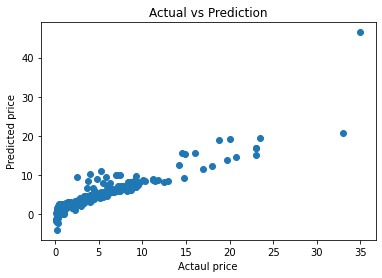

In [33]:
plt.scatter(Y_train,train_pred)
plt.xlabel("Actaul price")
plt.ylabel("Predicted price")
plt.title("Actual vs Prediction")
plt.show()

In [34]:
test_pred=model_lasso.predict(X_test)
test_acc=metrics.r2_score(test_pred,Y_test)
test_acc

0.7711110403265475

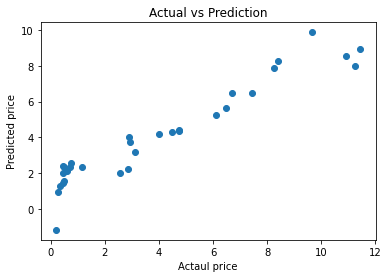

In [35]:
plt.scatter(Y_test,test_pred)
plt.xlabel("Actaul price")
plt.ylabel("Predicted price")
plt.title("Actual vs Prediction")
plt.show()